(14040, 13)
(14040, 1)
Accuracy: 0.8856837606837606
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1230
           1       0.94      0.85      0.89      1578

    accuracy                           0.89      2808
   macro avg       0.89      0.89      0.89      2808
weighted avg       0.89      0.89      0.89      2808

ROC-AUC on test set: 0.9239


C:\Users\fishm\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


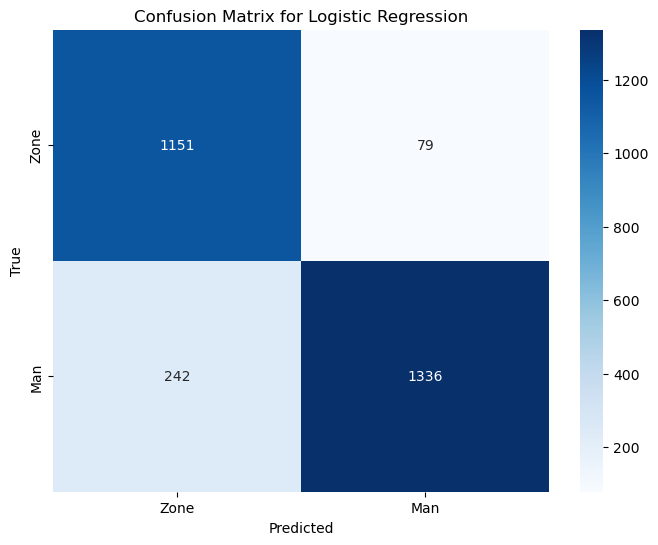

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib
import pandas as pd

# Load the datasets
train_features = pd.read_csv('../data/processed_data/training_features.csv')
train_labels = pd.read_csv('../data/processed_data/train_labels.csv')

print(train_features.shape)
print(train_labels.shape)

# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)        # Only transform the test data

# Apply L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C controls regularization strength
log_reg_l1.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred = log_reg_l1.predict(X_test_scaled)
y_prob = log_reg_l1.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC-AUC Score for the test set
roc_auc_final = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC on test set: {roc_auc_final:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Zone', 'Man'], yticklabels=['Zone', 'Man'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot to a file (e.g., PNG)
plt.savefig('../visuals/LogReg Results/training_model_confusion_matrix_logreg.png', bbox_inches='tight')
plt.show()

In [8]:
# Export the trained Logistic Regression model and scaler
joblib.dump(log_reg_l1, 'RUNvsPASS_logreg.pkl')  # Save the model to a file
joblib.dump(scaler, 'scaler.pkl')            # Save the scaler to ensure consistent preprocessing in the future

['scaler.pkl']